In [178]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
data = pd.read_csv('train.csv')
data.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [180]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64


In [181]:
data.loc[(data['Working Professional or Student'] == 'Student') & (data['Profession'].isna()), 'Profession'] = 'Student'

In [182]:
data.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [183]:
data['Pressure'] = data['Academic Pressure'].combine_first(data['Work Pressure'])

data = data.drop(columns=['Academic Pressure', 'Work Pressure'])

In [184]:
data.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0


In [185]:
data['Satisfaction'] = data['Study Satisfaction'].combine_first(data['Job Satisfaction'])

data = data.drop(columns=['Job Satisfaction', 'Study Satisfaction'])

In [186]:
data.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [187]:
data.shape

(140700, 18)

In [188]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                 8763
CGPA                                     112802
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                     21
Satisfaction                                 15
dtype: int64


In [189]:
data['Profession'] = data['Profession'].fillna('Unknown')

In [190]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
CGPA                                     112802
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
Pressure                                     21
Satisfaction                                 15
dtype: int64


In [191]:
count_working_professional = (data['Working Professional or Student'] == 'Working Professional').sum()
count_Students = (data['Working Professional or Student'] == 'Student').sum()

print("Count of 'Working Professional':", count_working_professional)
print("Count of 'Students':", count_Students)

Count of 'Working Professional': 112799
Count of 'Students': 27901


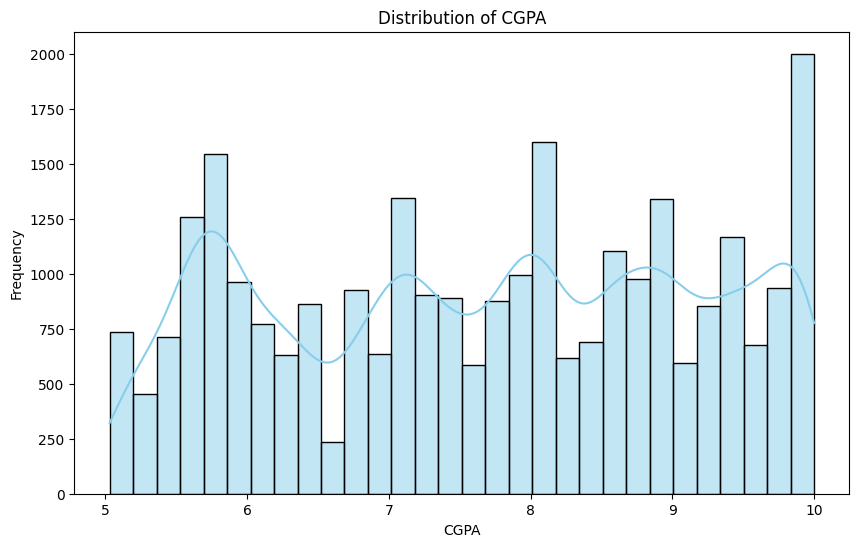

In [192]:
cgpa_data = data['CGPA'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(cgpa_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')

plt.show()

In [193]:
median_cgpa = data['CGPA'].median()

In [194]:
data['CGPA'] = data.apply(lambda row: -1 if row['Working Professional or Student'] == "Working Professional" else row['CGPA'], axis=1)

In [195]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      9
Sleep Duration                            0
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Pressure                                 21
Satisfaction                             15
dtype: int64


In [196]:
cgpa_null_rows = data[data['CGPA'].isnull()]

print("Rows where CGPA is NULL:")
print(cgpa_null_rows)

Rows where CGPA is NULL:
            id      Name  Gender   Age       City  \
21880    21880    Aarush    Male  38.0    Chennai   
52737    52737     Aarav    Male  28.0   Vadodara   
58062    58062    Ishita  Female  32.0   Vadodara   
70453    70453      Veda  Female  20.0  Ahmedabad   
75007    75007     Aarav    Male  21.0    Lucknow   
105773  105773     Anand    Male  18.0  Ahmedabad   
110097  110097   Abhinav    Male  34.0       Pune   
129756  129756      Kian    Male  18.0     Rajkot   
134830  134830  Aaradhya  Female  24.0     Meerut   

       Working Professional or Student Profession  CGPA     Sleep Duration  \
21880                          Student    Student   NaN          5-6 hours   
52737                          Student    Student   NaN  Less than 5 hours   
58062                          Student    Student   NaN  Less than 5 hours   
70453                          Student    Student   NaN  Less than 5 hours   
75007                          Student    Student   Na

In [197]:
data['CGPA'] = data['CGPA'].fillna(median_cgpa)

In [198]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                        0
Name                                      0
Gender                                    0
Age                                       0
City                                      0
Working Professional or Student           0
Profession                                0
CGPA                                      0
Sleep Duration                            0
Dietary Habits                            4
Degree                                    2
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          4
Family History of Mental Illness          0
Depression                                0
Pressure                                 21
Satisfaction                             15
dtype: int64


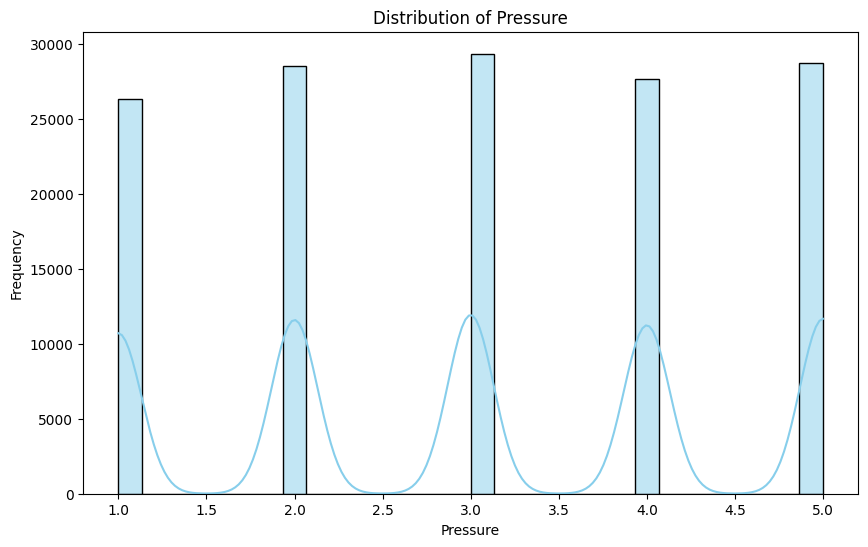

In [199]:
Pressure_data = data['Pressure'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Pressure_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

plt.show()

In [200]:
median_Pressure = data['Pressure'].median()
data['Pressure'] = data['Pressure'].fillna(median_Pressure)

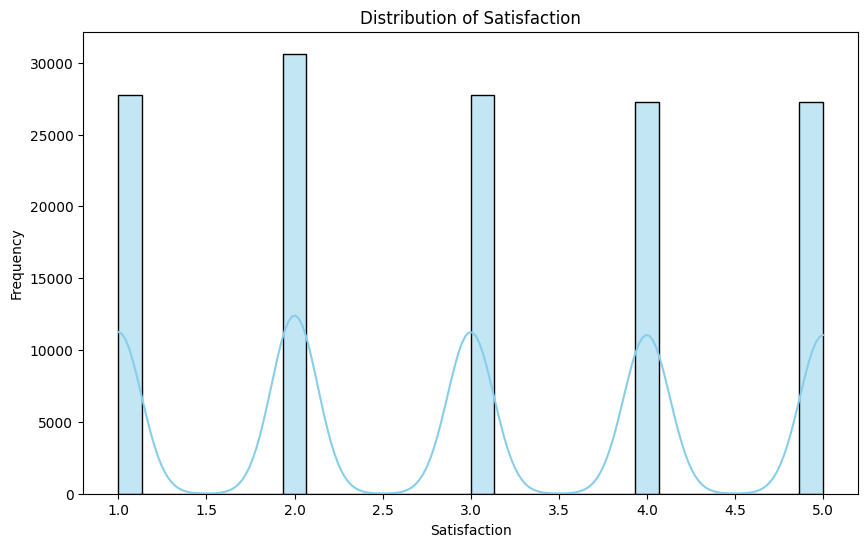

In [201]:
Satisfaction_data = data['Satisfaction'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Satisfaction_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')

plt.show()

In [202]:
median_Satisfaction = data['Satisfaction'].median()
data['Satisfaction'] = data['Satisfaction'].fillna(median_Satisfaction)

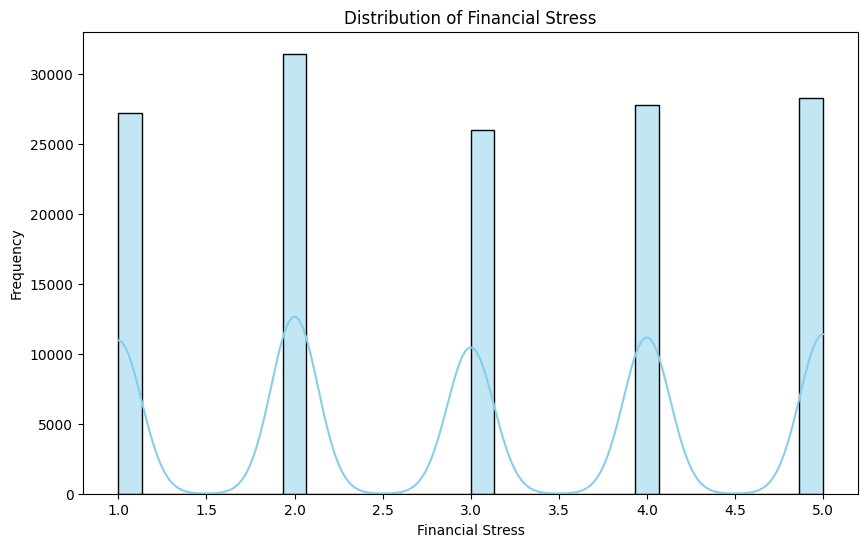

In [203]:
Financial_Stress_data = data['Financial Stress'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(Financial_Stress_data, bins=30, kde=True, color='skyblue')

plt.title('Distribution of Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')

plt.show()

In [204]:
median_Financial_Stress = data['Financial Stress'].median()
data['Financial Stress'] = data['Financial Stress'].fillna(median_Financial_Stress)

In [205]:
data.shape

(140700, 18)

In [208]:
null_counts = data.isnull().sum()

print("Null values per column:")
print(null_counts)

Null values per column:
id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Pressure                                 0
Satisfaction                             0
dtype: int64


In [207]:
data = data.dropna(axis=0)

In [209]:
data.shape

(140694, 18)